In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [111]:
raw_df = pd.read_csv('./weatherAUS.csv')
raw_df.dropna(subset=['RainTomorrow'], inplace=True)
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (98988, 23)
val_df.shape : (17231, 23)
test_df.shape : (25974, 23)


In [112]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [113]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [114]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [115]:
print(numeric_cols)
print(categorical_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [116]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean').fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [117]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [118]:
val_inputs.describe().loc[['min', 'max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


In [119]:
from sklearn.preprocessing import OneHotEncoder

In [120]:
encoder = OneHotEncoder( handle_unknown='ignore').fit(raw_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [121]:
encoded_array = encoder.transform(train_inputs[categorical_cols])
encoded_df = pd.DataFrame(encoded_array.toarray() ,columns=encoded_cols, index=train_inputs.index)
train_inputs[encoded_cols] = encoded_df
encoded_array = encoder.transform(val_inputs[categorical_cols])
encoded_df = pd.DataFrame(encoded_array.toarray() ,columns=encoded_cols, index=val_inputs.index)
val_inputs[encoded_cols] = encoded_df
encoded_array = encoder.transform(test_inputs[categorical_cols])
encoded_df = pd.DataFrame(encoded_array.toarray() ,columns=encoded_cols, index=test_inputs.index)
test_inputs[encoded_cols] = encoded_df

C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_13648\2200513679.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoded_df
C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_13648\2200513679.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoded_df
C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_13648\2200513679.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor p

**drop textual content so that we just left with numeric cols**

In [122]:
x_train = train_inputs[numeric_cols + encoded_cols]
x_val = val_inputs[numeric_cols + encoded_cols]
x_test = test_inputs[numeric_cols + encoded_cols]

In [123]:
from sklearn.tree import DecisionTreeClassifier 
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train,train_targets)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [124]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 98988, dtype: object

In [125]:
train_pred = model.predict(x_train)
train_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'],
      shape=(98988,), dtype=object)

In [126]:
train_targets.value_counts()

RainTomorrow
No     76705
Yes    22283
Name: count, dtype: int64

In [127]:
pd.value_counts(train_pred)

C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_13648\4256379773.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_pred)


No     76707
Yes    22281
Name: count, dtype: int64

In [128]:
from sklearn.metrics import accuracy_score
accuracy_score(train_targets,train_pred)

0.9999797955307714

In [129]:
val_pred = model.predict(x_val)
accuracy_score(val_targets,val_pred)

0.7921188555510418

In [130]:
model.score(x_val,val_targets)

0.7921188555510418

In [131]:
val_targets.value_counts()/len(val_targets)

RainTomorrow
No     0.788289
Yes    0.211711
Name: count, dtype: float64

It appears that the model has learned the training examples perfect, and doesn't generalize well to previously unseen examples. This phenomenon is called "overfitting", and reducing overfitting is one of the most important parts of any machine learning project.

### **visualisation**

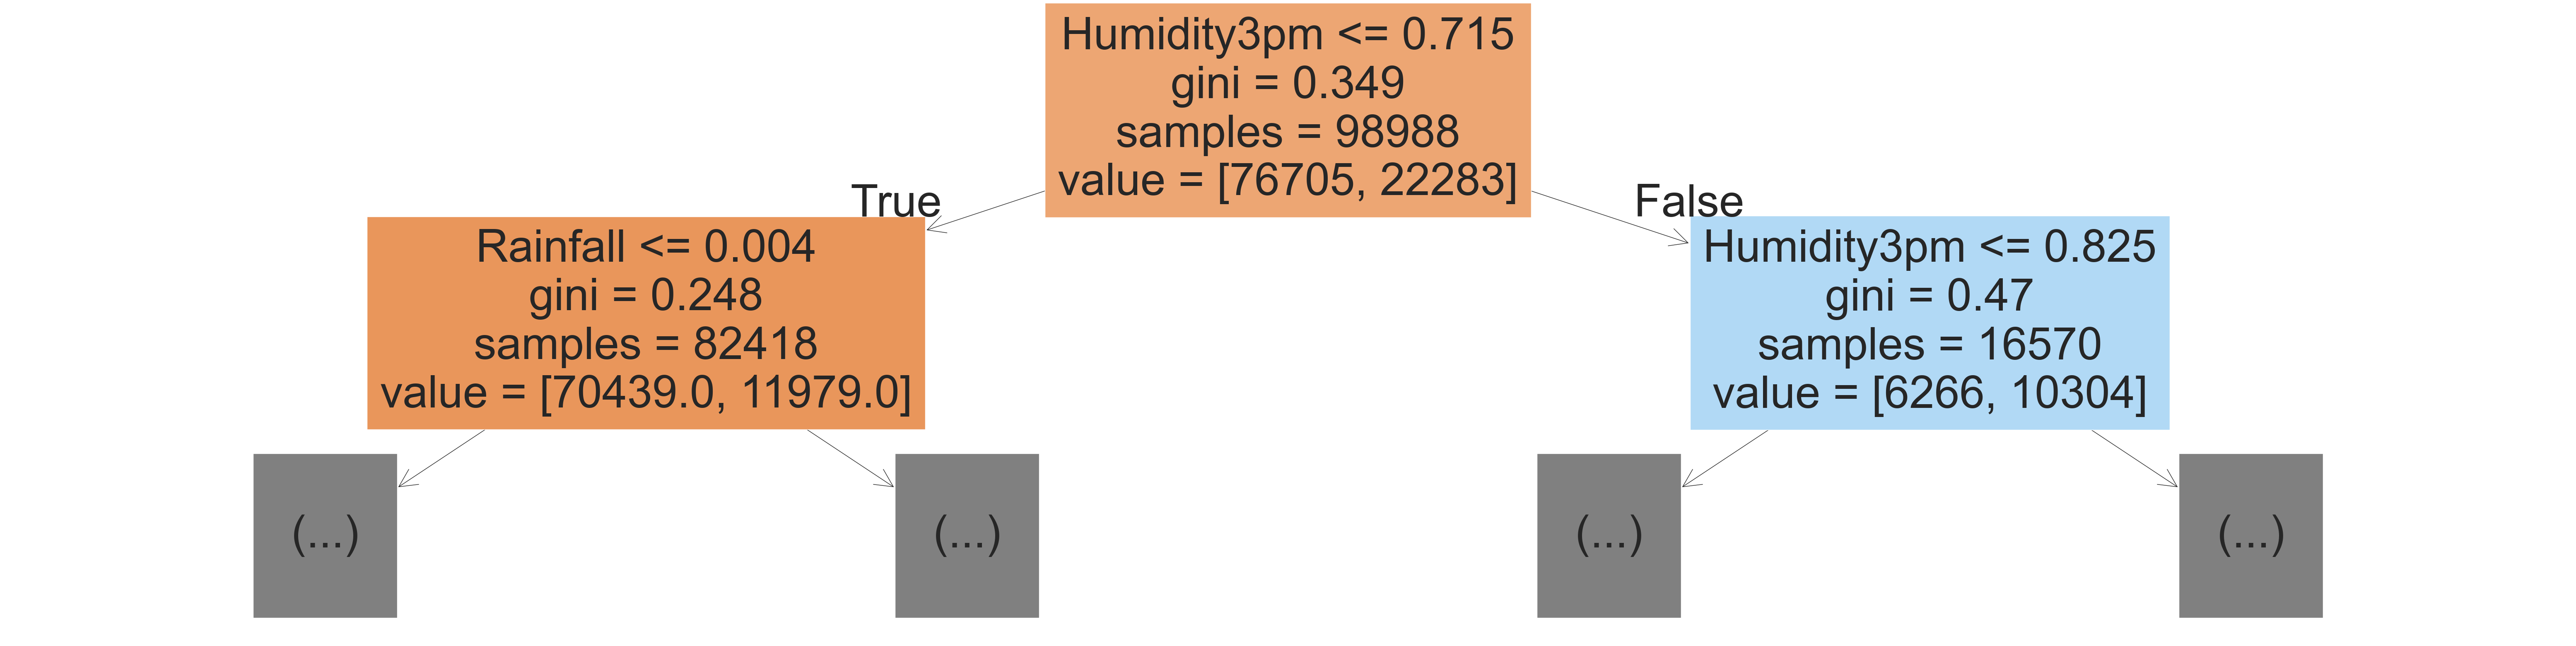

In [132]:
from sklearn.tree import plot_tree , export_text

plt.figure(figsize=(80,20))
plot_tree(model, feature_names=x_train.columns, max_depth=1, filled=True);

[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]'),
 Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'WindGustSpeed <= 0.279\ngini = 0.499\nsamples = 9136\nvalue = [4804, 4332]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.01\ngini = 0.316\nsamples = 7434\nvalue = [1462, 5972]'),
 Text(0.8125, 0.125,

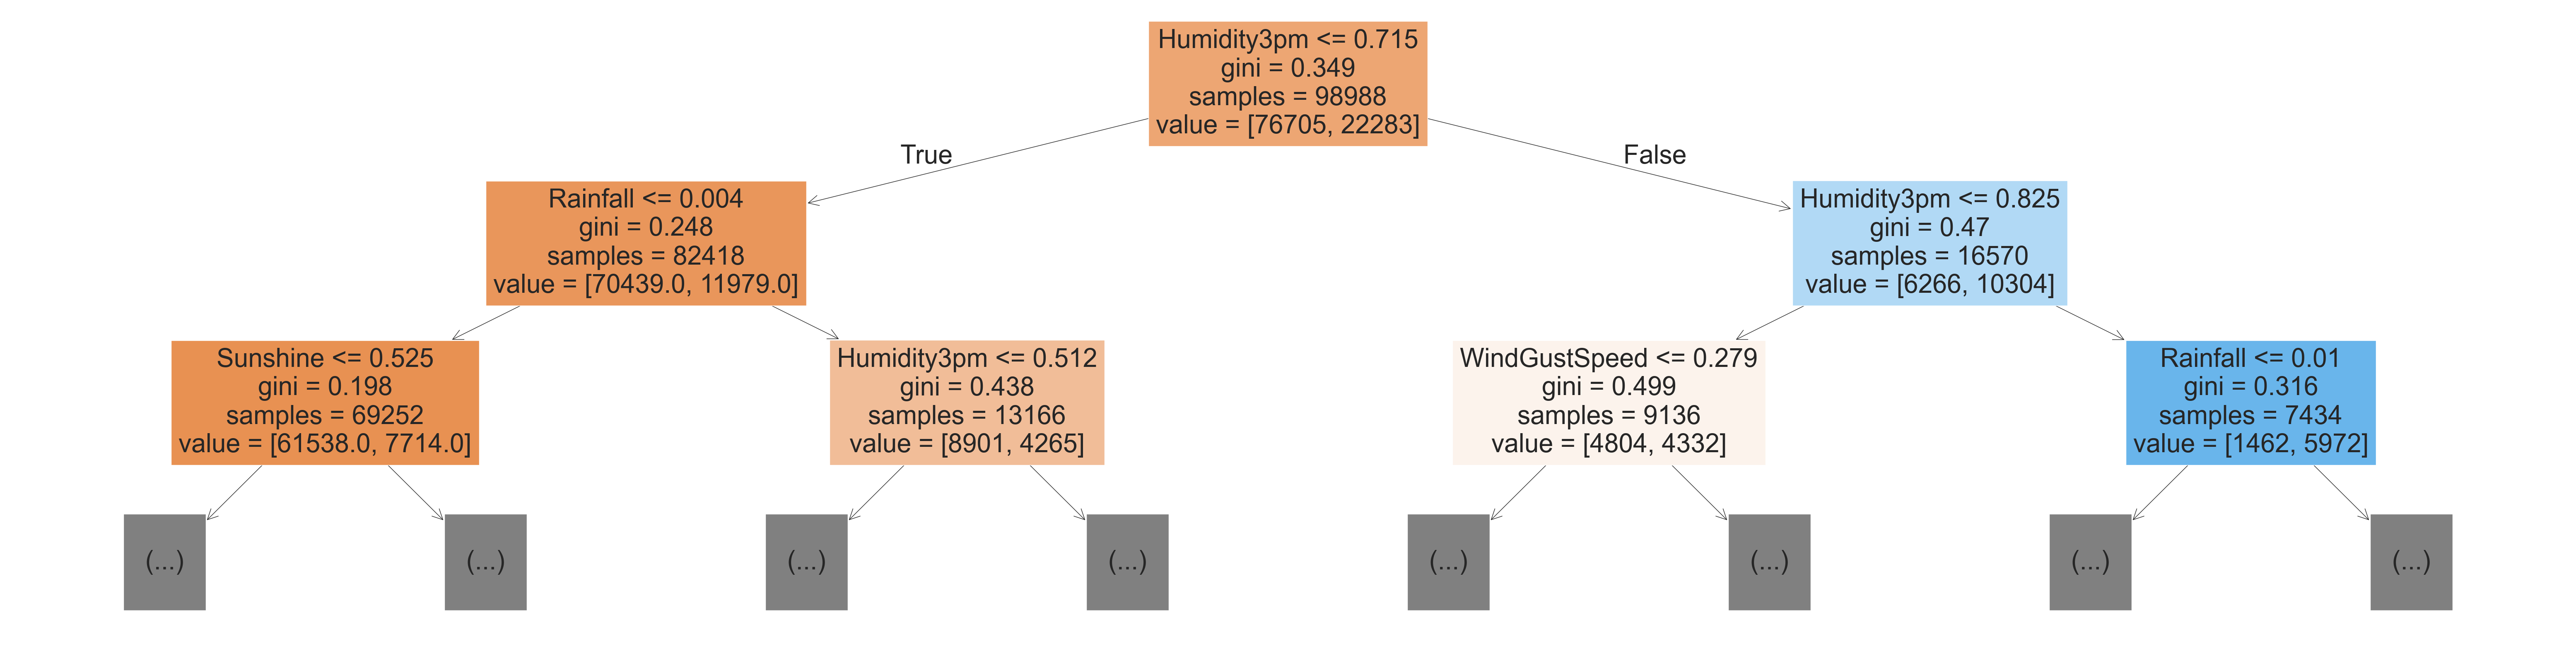

In [133]:
plt.figure(figsize=(80,20))
plot_tree(model , feature_names=x_val.columns , max_depth=2 , filled=True)

In [134]:
tree_text = export_text(model , feature_names=list(x_train.columns) ,max_depth=10 )
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

In [135]:
print(len(model.feature_importances_))
len(model.feature_importances_) == len(x_train.columns)

119


True

In [136]:
importance_df = pd.DataFrame({'feature':x_train.columns , 'importance':model.feature_importances_})
importance_df = importance_df.sort_values(by='importance' , ascending=False)

<Axes: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

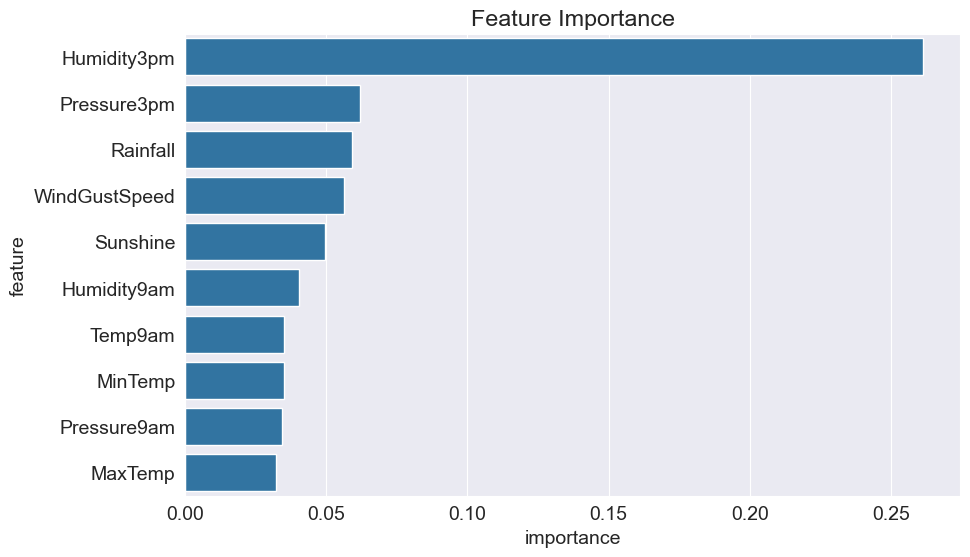

In [137]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10) , x='importance' , y='feature')

## Hyperparameter Tuning and Overfitting

As we saw in the previous section, our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was only marginally better than a dumb baseline model. This phenomenon is called overfitting, and in this section, we'll look at some strategies for reducing overfitting.

The `DecisionTreeClassifier` accepts several arguments, some of which can be modified to reduce overfitting.

In [179]:
model = DecisionTreeClassifier(random_state=42 , max_depth=3)
model.fit(x_train , train_targets)


,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [139]:
print("Training data score : " , np.round(model.score(x_train , train_targets) * 100 , 2) , '%')
print( "Validation data score : ", np.round(model.score(x_val , val_targets) * 100 , 2) , '%')

Training data score :  82.91 %
Validation data score :  83.34 %


['No' 'Yes']
[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.349\nsamples = 98988\nvalue = [76705, 22283]\nclass = No'), Text(0.25, 0.625, 'Rainfall <= 0.004\ngini = 0.248\nsamples = 82418\nvalue = [70439.0, 11979.0]\nclass = No'), Text(0.375, 0.75, 'True  '), Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.198\nsamples = 69252\nvalue = [61538.0, 7714.0]\nclass = No'), Text(0.0625, 0.125, 'gini = 0.363\nsamples = 12620\nvalue = [9618, 3002]\nclass = No'), Text(0.1875, 0.125, 'gini = 0.153\nsamples = 56632\nvalue = [51920, 4712]\nclass = No'), Text(0.375, 0.375, 'Humidity3pm <= 0.512\ngini = 0.438\nsamples = 13166\nvalue = [8901, 4265]\nclass = No'), Text(0.3125, 0.125, 'gini = 0.293\nsamples = 4299\nvalue = [3531, 768]\nclass = No'), Text(0.4375, 0.125, 'gini = 0.478\nsamples = 8867\nvalue = [5370, 3497]\nclass = No'), Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.47\nsamples = 16570\nvalue = [6266, 10304]\nclass = Yes'), Text(0.625, 0.75, '  False'), Text(0.625, 0.375, 'WindGust

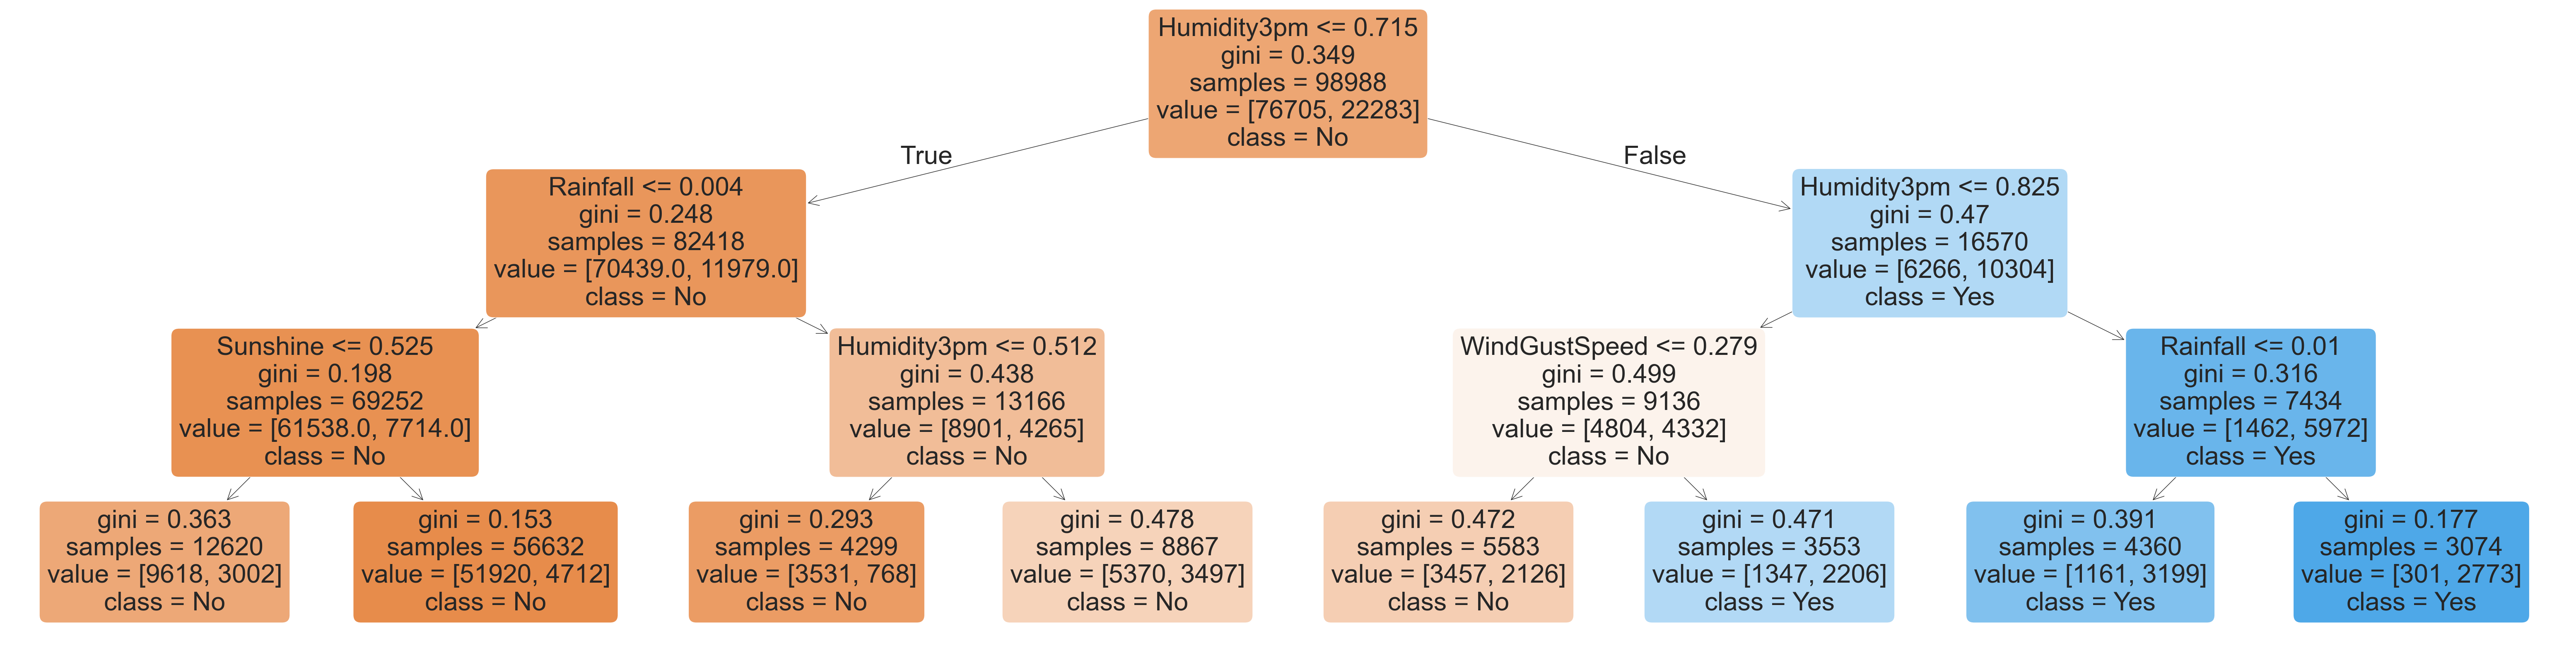

In [140]:
plt.figure(figsize=(80,20))
print(model.classes_)
print(plot_tree(model , feature_names=x_train.columns , max_depth=3 , filled=True , rounded=True , class_names=model.classes_));

In [141]:
print(export_text(model , feature_names=list(x_train.columns)))

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- class: No
|   |   |--- Sunshine >  0.52
|   |   |   |--- class: No
|   |--- Rainfall >  0.00
|   |   |--- Humidity3pm <= 0.51
|   |   |   |--- class: No
|   |   |--- Humidity3pm >  0.51
|   |   |   |--- class: No
|--- Humidity3pm >  0.72
|   |--- Humidity3pm <= 0.82
|   |   |--- WindGustSpeed <= 0.28
|   |   |   |--- class: No
|   |   |--- WindGustSpeed >  0.28
|   |   |   |--- class: Yes
|   |--- Humidity3pm >  0.82
|   |   |--- Rainfall <= 0.01
|   |   |   |--- class: Yes
|   |   |--- Rainfall >  0.01
|   |   |   |--- class: Yes



In [142]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(x_train, train_targets)
    train_error = 1 - model.score(x_train, train_targets)
    val_error = 1 - model.score(x_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_error, 'Validation Error': val_error}

In [143]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: total: 27 s
Wall time: 27.7 s


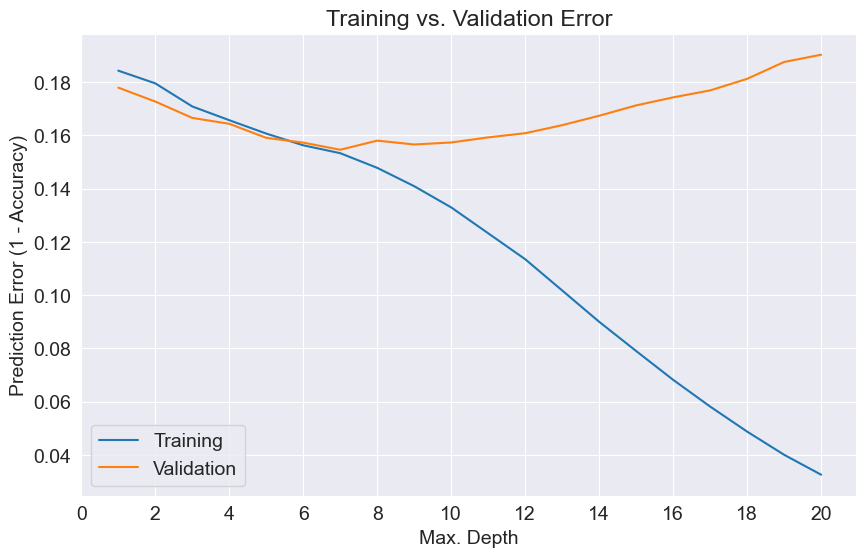

In [144]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

This is a common pattern you'll see with all machine learning algorithms:

<img src="https://i.imgur.com/EJCrSZw.png" width="480">




In [145]:
model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(x_train, train_targets)
model.score(x_val, val_targets)

0.8453949277465034

In [146]:
print("Training data score : " , np.round(model.score(x_train , train_targets) * 100 , 2) , '%')
print( "Validation data score : ", np.round(model.score(x_val , val_targets) * 100 , 2) , '%')

Training data score :  84.67 %
Validation data score :  84.54 %


In [147]:
model = DecisionTreeClassifier(max_leaf_nodes=128 , random_state=42)
model.fit(x_train , train_targets)

print("Training data score : " , np.round(model.score(x_train , train_targets) * 100 , 2) , '%')
print( "Validation data score : ", np.round(model.score(x_val , val_targets) * 100 , 2) , '%')

Training data score :  84.8 %
Validation data score :  84.42 %


In [148]:
def max_leaf_nodes_error(mln):
    model = DecisionTreeClassifier(max_leaf_nodes=mln, random_state=42)
    model.fit(x_train, train_targets)
    train_error = 1 - model.score(x_train, train_targets)
    val_error = 1 - model.score(x_val, val_targets)
    return {'Max Leaf Nodes': mln, 'Training Error': train_error, 'Validation Error': val_error}

In [149]:
leaf_node_error_df = pd.DataFrame([max_leaf_nodes_error(mln) for mln in range(20, 130, 10)])

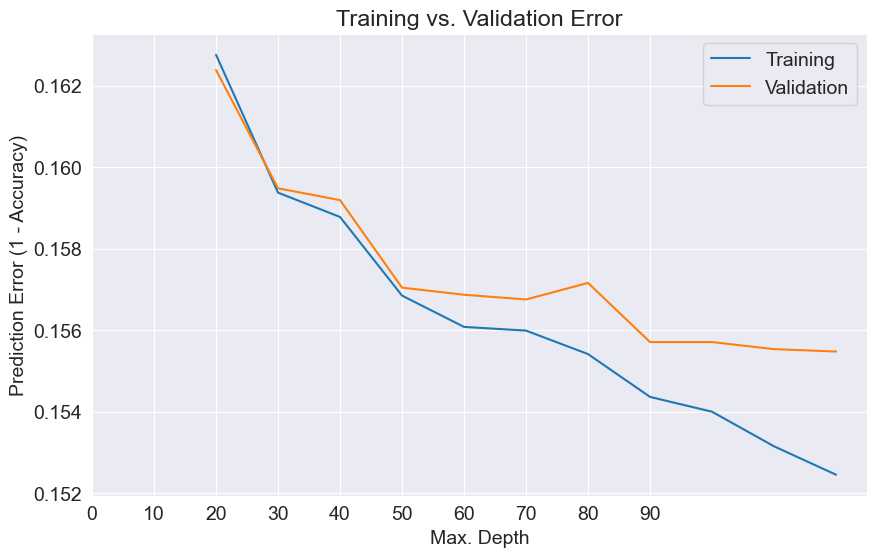

In [150]:
plt.figure()
plt.plot(leaf_node_error_df['Max Leaf Nodes'], leaf_node_error_df['Training Error'])
plt.plot(leaf_node_error_df['Max Leaf Nodes'], leaf_node_error_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,100, 10))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [151]:
model = DecisionTreeClassifier(max_depth=7 , max_leaf_nodes=128 , random_state=42).fit(x_train, train_targets)
print("Training data score : " , np.round(model.score(x_train , train_targets) * 100 , 2) , '%')
print( "Validation data score : ", np.round(model.score(x_val , val_targets) * 100 , 2) , '%')

Training data score :  84.67 %
Validation data score :  84.54 %


## Training a Random Forest

While tuning the hyperparameters of a single decision tree may lead to some improvements, a much more effective strategy is to combine the results of several decision trees trained with slightly different parameters. This is called a random forest. 

The key idea here is that each decision tree in the forest will make different kinds of errors, and upon averaging, many of their errors will cancel out. This idea is also known as the "wisdom of the crowd" in common parlance:

<img src="https://i.imgur.com/4Dg0XK4.png" width="480">

In [184]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1 , random_state=42)



In [185]:
%%time
model.fit(x_train , train_targets)

CPU times: total: 39.1 s
Wall time: 4.21 s


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [186]:
model.score(x_train, train_targets)

0.9999494888269285

In [187]:
model.score(x_val , val_targets)

0.8566537055307295

Once again, the training accuracy is 100%, but this time the validation accuracy is much better. In fact, it is better than the best single decision tree we had trained so far. Do you see the power of random forests?

This general technique of combining the results of many models is called "ensembling", it works because most errors of individual models cancel out on averaging. Here's what it looks like visually:

<img src="https://i.imgur.com/qJo8D8b.png" width="480">


We can also look at the probabilities for the predictions. The probability of a class is simply the fraction of trees which that predicted the given class.

In [188]:
print(model.classes_)
train_probs = model.predict_proba(x_train)
train_probs

['No' 'Yes']


array([[0.93, 0.07],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.96, 0.04]], shape=(98988, 2))

We can can access individual decision trees using `model.estimators_`

In [189]:
model.estimators_[0]

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,random_state,1608637542
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


100


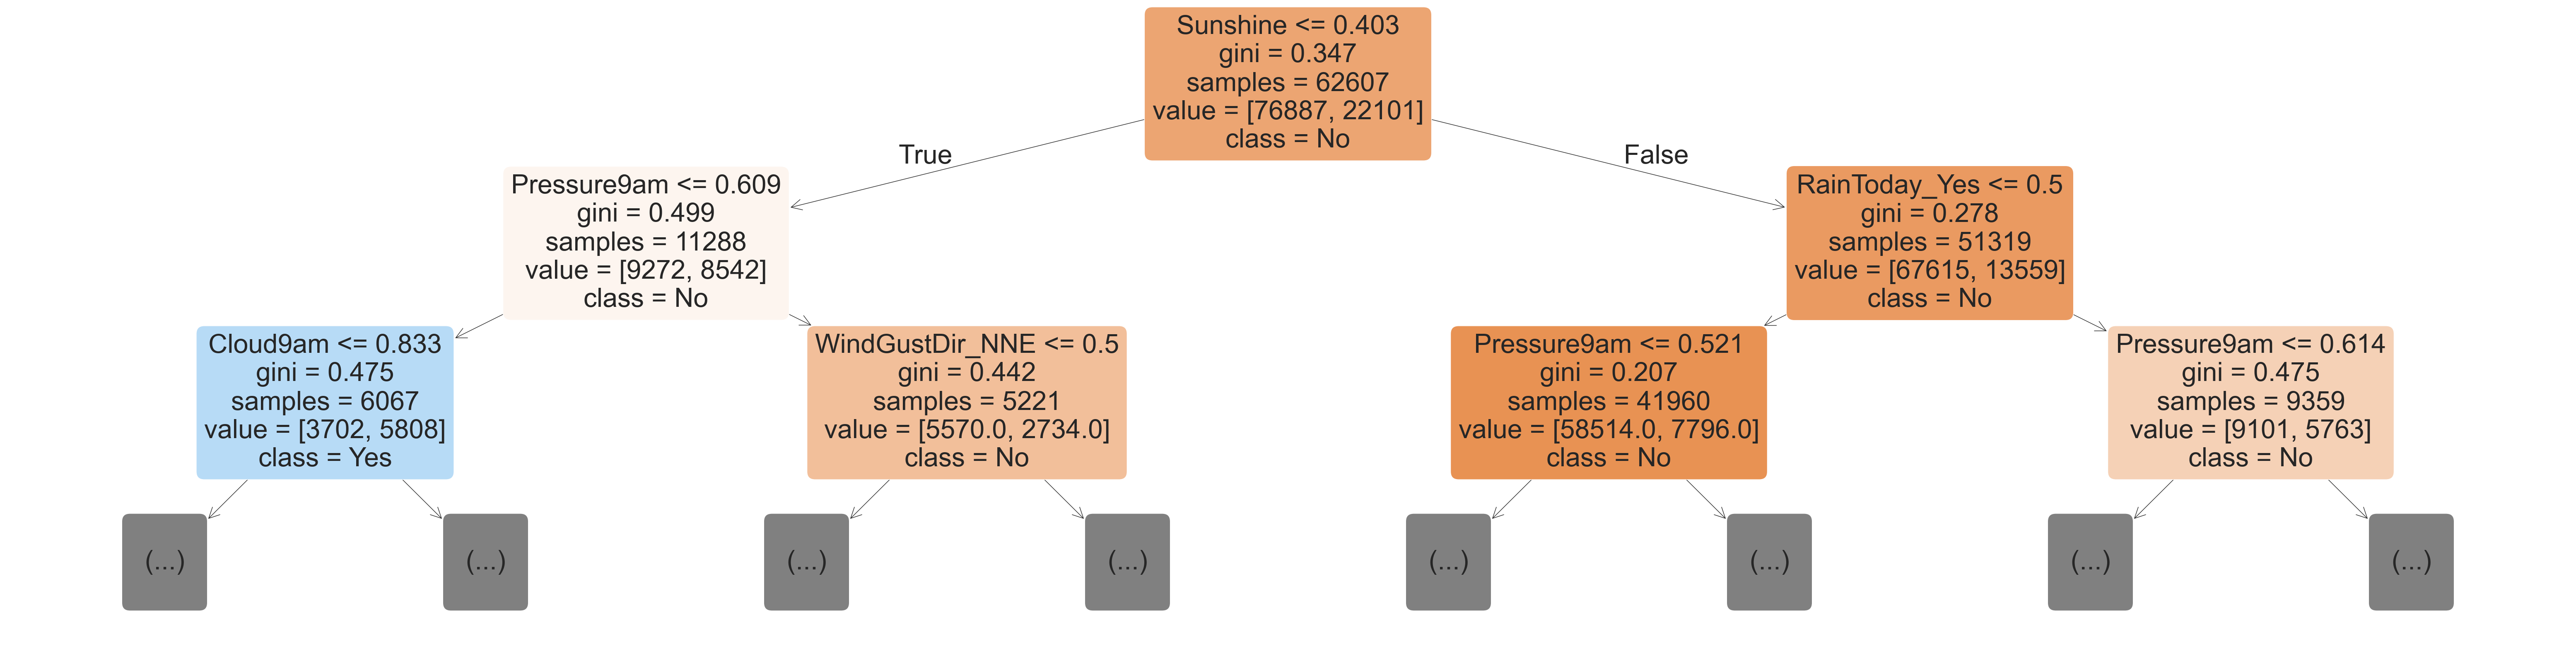

In [190]:
plt.figure(figsize=(80,20))
print(len(model.estimators_))
plot_tree(model.estimators_[0], max_depth=2, feature_names=x_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(train_targets)
y_val_enc = le.transform(val_targets)

# Train forest with encoded labels
model.fit(x_train, y_train_enc)


# Predictions
for i, tree in enumerate(model.estimators_):
    preds = tree.predict(x_val)
    score = accuracy_score(y_val_enc, preds)
    print(f"Tree {i+1} Accuracy: {score:.3f}")


In [197]:
model.score(x_val , y_val_enc)

0.8566537055307295

In [200]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [204]:
importance_df.head()

,feature,importance
9,Humidity3pm,0.139904
4,Sunshine,0.053696
11,Pressure3pm,0.052713
8,Humidity9am,0.050051
2,Rainfall,0.048077


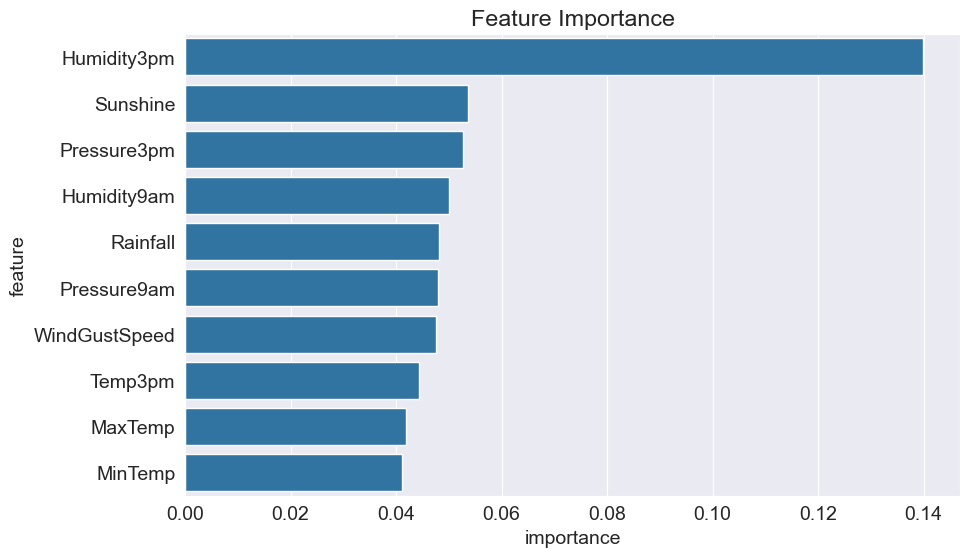

In [203]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Hyperparameter Tuning with Random Forests

Just like decision trees, random forests also have several hyperparameters. In fact many of these hyperparameters are applied to the underlying decision trees. 

Let's study some the hyperparameters for random forests. You can learn more about them here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
from sklearn.ensemble import RandomForestClassifier
base_model = RandomForestClassifier(random_state=42 , n_jobs=-1).fit(x_train ,train_targets)
base_train_acc = base_model.score(x_train , train_targets)
base_val_acc = base_model.score(x_val , val_targets)

print("Base Model Train Accuracy : " , np.round(base_train_acc * 100 , 2) , '%')
print("Base Model Validation Accuracy : " , np.round(base_val_acc * 100 , 2) , '%')